In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/COVID-19_Vaccination_Demographics_in_the_United_States_National.csv')
# link to data: https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Demographics-in-the-United-St/km4m-vcsb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11396 entries, 0 to 11395
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    11396 non-null  object 
 1   Demographic_category                    11396 non-null  object 
 2   Administered_Dose1                      11396 non-null  int64  
 3   Administered_Dose1_pct_known            10989 non-null  float64
 4   Administered_Dose1_pct_US               11396 non-null  float64
 5   Series_Complete_Yes                     11396 non-null  int64  
 6   Administered_Dose1_pct_agegroup         8954 non-null   float64
 7   Series_Complete_Pop_pct_agegroup        8954 non-null   float64
 8   Series_Complete_Pop_Pct_known           10989 non-null  float64
 9   Series_Complete_Pop_Pct_US              11396 non-null  float64
 10  Booster_Doses_Vax_pct_agegroup          11396 non-null  fl

**Preprocessing Dataframe**

In [ ]:
df = df.drop(columns="Booster_Doses_Yes_Last14Days")

In [ ]:
df = df.dropna(axis=0)

In [ ]:
# array of values to drop 
values = ['Sex_known', 'Age_known', 'Race__eth_known']

#dropping rows with this value in column 'Demographic_catgeory'
df = df[df.Demographic_category.isin(values) == False]
df
#followed example from https://www.statology.org/pandas-drop-rows-with-value/

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes
0,01/23/2022,Race_eth_NHAsian,12503130,6.7,5.0,11079162,65.8,58.3,6.8,5.3,82.9,4.6,4.1,5.6,1252024
1,01/23/2022,Ages_50-64_yrs,58547929,23.4,23.3,50449331,92.0,79.2,24.0,24.0,0.0,0.0,0.0,0.0,0
2,01/23/2022,Ages_16-17_yrs,5851071,2.3,2.3,4942223,69.7,58.9,2.3,2.3,0.0,0.0,0.0,0.0,0
3,01/23/2022,Ages_12-17_yrs,16629800,6.6,6.6,13923641,65.7,55.0,6.6,6.6,0.0,0.0,0.0,0.0,0
4,01/23/2022,Ages_5-11_yrs,8376188,3.3,3.3,5719260,29.1,19.9,2.7,2.7,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,12/13/2020,Race_eth_NHAIAN,217,1.3,1.0,27,0.0,0.0,0.8,0.6,0.0,0.0,0.3,0.0,0
11391,12/13/2020,Ages_12-15_yrs,165,0.8,0.7,13,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0
11392,12/13/2020,Ages_16-17_yrs,158,0.7,0.7,33,0.0,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0
11394,12/13/2020,Ages_18-24_yrs,888,4.0,4.0,186,0.0,0.0,3.9,3.9,0.0,0.0,0.0,0.0,0


**Visualizations**

In [ ]:
#making new dataframe that only contains values in column 'Demographic_category' that are 'Sex_male' or 'Sex_female' and is only those two columns
values_male_female = ['Sex_Female', 'Sex_Male']
df_male_female = df[df.Demographic_category.isin(values_male_female) == True]
df_male_female[['Date', 'Demographic_category', 'Series_Complete_Yes']]

,Date,Demographic_category,Series_Complete_Yes
8,01/23/2022,Sex_Female,109545264
17,01/23/2022,Sex_Male,99298289
32,01/22/2022,Sex_Male,99298289
39,01/22/2022,Sex_Female,109545264
60,01/21/2022,Sex_Female,109539785
...,...,...,...
11325,12/15/2020,Sex_Female,2575
11347,12/14/2020,Sex_Male,2334
11359,12/14/2020,Sex_Female,2462
11375,12/13/2020,Sex_Male,2294


,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes
8,01/23/2022,Sex_Female,129829779,52.2,51.8,109545264,77.0,65.0,52.5,52.1,63.5,55.0,54.8,56.9,16726844
17,01/23/2022,Sex_Male,118698320,47.8,47.3,99298289,72.6,60.7,47.5,47.2,62.9,45.0,45.2,43.1,13677224


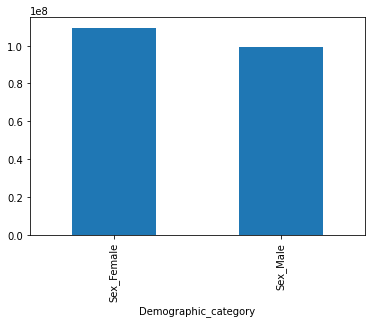

In [ ]:
#use group by and count methods to count how many times Sex_Male and Sex_Female values appear in dataset 
# https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

display(df_male_female.loc[df['Date']=='01/23/2022'])
df_male_female.loc[df['Date']=='01/23/2022'].plot.bar(y='Series_Complete_Yes', x='Demographic_category',legend=False)


It appears from the above visualization that the total number of males who are fully vaccinated with two doses of the COVID-19 vaccine is less than the total for females.

In [ ]:
values_age = ['Ages_50-64_yrs', 'Ages_12-17_yrs', 'Ages_5-11_yrs', 'Ages_75+_yrs', 'Ages_18-24_yrs', 'Ages_25-39_yrs', 'Ages_40-49_yrs']
df_age = df[df.Demographic_category.isin(values_age) == True]
df_age_last_updated = df_age.loc[df['Date']=='01/23/2022']
display(df_age_last_updated)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes
1,01/23/2022,Ages_50-64_yrs,58547929,23.4,23.3,50449331,92.0,79.2,24.0,24.0,0.0,0.0,0.0,0.0,0
3,01/23/2022,Ages_12-17_yrs,16629800,6.6,6.6,13923641,65.7,55.0,6.6,6.6,0.0,0.0,0.0,0.0,0
4,01/23/2022,Ages_5-11_yrs,8376188,3.3,3.3,5719260,29.1,19.9,2.7,2.7,0.0,0.0,0.0,0.0,0
7,01/23/2022,Ages_75+_yrs,22766982,9.1,9.1,19459520,95.0,85.0,9.3,9.3,65.3,41.8,40.3,37.8,12712533
13,01/23/2022,Ages_18-24_yrs,22917247,9.1,9.1,18436321,74.9,60.3,8.8,8.8,0.0,0.0,0.0,0.0,0
25,01/23/2022,Ages_25-39_yrs,53121583,21.2,21.2,43959333,77.7,64.3,20.9,20.9,0.0,0.0,0.0,0.0,0
27,01/23/2022,Ages_40-49_yrs,34693435,13.8,13.8,29534941,85.1,72.4,14.0,14.0,0.0,0.0,0.0,0.0,0


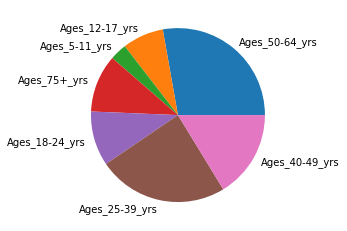

In [ ]:
plt.pie(df_age_last_updated['Series_Complete_Yes'], labels=df_age_last_updated['Demographic_category'])
plt.show()
# https://www.tutorialspoint.com/python-plot-a-pie-chart-for-pandas-dataframe-with-matplotlib

In [ ]:
values_race = ['Race_eth_NHAsian', 'Race_eth_NHWhite', 'Race_eth_NHBlack', 'Race_eth_NHAIAN', 'Race_eth_NHMult_Oth', 'Race_eth_Hispanic', 'Race_eth_NHNHOPI']
df_race = df[df.Demographic_category.isin(values_race) == True]
df_race_last_updated = df_race.loc[df['Date']=='01/23/2022']
display(df_race_last_updated)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes
0,01/23/2022,Race_eth_NHAsian,12503130,6.7,5.0,11079162,65.8,58.3,6.8,5.3,82.9,4.6,4.1,5.6,1252024
10,01/23/2022,Race_eth_NHWhite,103438336,55.7,41.2,92567243,52.4,46.9,56.8,44.0,74.7,72.8,71.1,63.7,19747467
11,01/23/2022,Race_eth_NHBlack,18757289,10.1,7.5,16119013,45.5,39.1,9.9,7.7,66.7,7.6,8.3,10.9,2050248
18,01/23/2022,Race_eth_NHAIAN,1672478,0.9,0.7,1369022,68.7,56.2,0.8,0.7,62.2,0.5,0.6,0.7,142845
20,01/23/2022,Race_eth_NHMult_Oth,11079544,6.0,4.4,9658462,95.0,95.0,5.9,4.6,73.7,5.9,5.8,5.1,1592032
22,01/23/2022,Race_eth_Hispanic,37660453,20.3,15.0,31518716,59.1,49.4,19.4,15.0,62.5,8.5,10.0,13.8,2312780
26,01/23/2022,Race_eth_NHNHOPI,587085,0.3,0.2,518391,63.2,55.8,0.3,0.2,64.0,0.2,0.2,0.3,43883


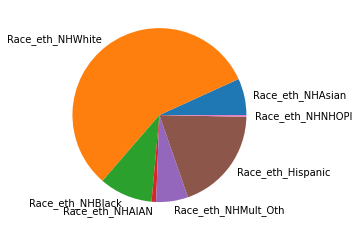

In [ ]:
plt.pie(df_race_last_updated['Series_Complete_Yes'], labels=df_race_last_updated['Demographic_category'])
plt.show()

The following code was obtained from the in-class scikit learn demo we have been working on:


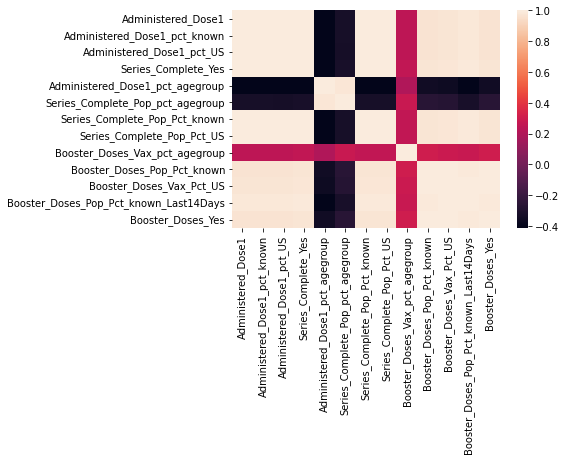

In [ ]:
sns.heatmap(df_race_last_updated.corr())

In [ ]:
# To help us calculate cramers_v from above reference.
# A 1 means highly associated, a 0 means not
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
cramers_v(df['Demographic_category'], df['class'])